In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# IMPORT RAW DATA
years = [2008, 2009, 2010, 2012, 2013, 2014, 2015, 2016]

def load_data(years):
    dataframes = []
    # ls = [2014]
    for year in years:
    # for year in range(2008, 2017):
        filename = str(year)+'.csv'
        try: 
            this_data = pd.read_csv(filename, na_values=' ')
        except:
            this_data = pd.read_csv(filename, encoding= 'unicode_escape', na_values=' ')
            # , dtype={'timestop': str}

        if year in range(2011, 2017):
            this_data = this_data.drop(columns=['forceuse'])
        if year in range(2013, 2017):
            this_data = this_data.rename(columns={'dettypCM': 'dettypcm', 
                                                  'lineCM': 'linecm', 
                                                  'detailCM': 'detailcm'})
        # replace " " to NA
    #     this_data.replace(" ", pd.NA, inplace=True)
        dataframes.append(this_data)

    sqf_data_full = pd.concat(dataframes, ignore_index=True)
    sqf_data = sqf_data_full.copy()
    return sqf_data

In [ ]:
data = load_data(years)

<ipython-input-3-4d9803994c63>:13: DtypeWarning: Columns (73,74,105) have mixed types. Specify dtype option on import or set low_memory=False.
  this_data = pd.read_csv(filename, encoding= 'unicode_escape', na_values=' ')
<ipython-input-3-4d9803994c63>:13: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  this_data = pd.read_csv(filename, encoding= 'unicode_escape', na_values=' ')
<ipython-input-3-4d9803994c63>:11: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  this_data = pd.read_csv(filename, na_values=' ')
<ipython-input-3-4d9803994c63>:11: DtypeWarning: Columns (10,95,105) have mixed types. Specify dtype option on import or set low_memory=False.
  this_data = pd.read_csv(filename, na_values=' ')
<ipython-input-3-4d9803994c63>:11: DtypeWarning: Columns (10,17,90) have mixed types. Specify dtype option on import or set low_memory=False.
  this_data = pd.read_csv(filename, na_v

In [ ]:
data.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2008,42,1044,1012008,130.0,A,O,NaN,20.0,FEL,...,NaN,42.0,B,NaN,NaN,1009873.0,243953.0,CM,1.0,20.0
1,2008,108,3,1012008,2010.0,A,I,NaN,1.0,BURGLARY,...,NaN,108.0,B,NaN,NaN,1001546.0,210784.0,CM,1.0,14.0
2,2008,100,15,1082008,100.0,A,O,H,2.0,ROBBERY,...,NaN,100.0,B,2.0,NaN,1042944.0,154180.0,CM,1.0,85.0
3,2008,103,210,1082008,1905.0,A,O,NaN,2.0,ROBBERY,...,NaN,103.0,J,16.0,NaN,1050245.0,196802.0,CM,1.0,85.0
4,2008,71,90,1122008,2125.0,A,I,H,5.0,CRIM-TRES,...,NaN,71.0,C,5.0,PP,995112.0,180043.0,CM,1.0,31.0


In [ ]:
column_names = ['year', 'pistol', 'riflshot', 'asltweap', 'machgun', 'knifcuti', 'othrweap',
                'pct', 'trhsloc', 
                'ac_assoc', 'ac_cgdir', 'ac_rept', 'ac_evasv', 'ac_incid', 
                'ac_inves', 'ac_proxm', 'ac_time', 'ac_stsnd', 'ac_other',
                'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'cs_cloth', 'cs_drgtr', 
                'cs_furtv', 'cs_vcrim', 'cs_bulge', 'cs_other', 'age', 'build', 'sex', 
                'ht_feet', 'ht_inch', 'weight', 'inout', 'radio', 'perobs', 'datestop', 'timestop']

In [ ]:
data = data[column_names]

In [ ]:
data['pistol'].value_counts()

N    2513767
Y       3644
1         54
Name: pistol, dtype: int64

In [ ]:
data['riflshot'].value_counts()

N    2517274
Y        137
1          1
Name: riflshot, dtype: int64

In [ ]:
data['asltweap'].value_counts()

N    2517212
Y        199
1          1
Name: asltweap, dtype: int64

In [ ]:
data['machgun'].value_counts()

N    2517387
Y         24
Name: machgun, dtype: int64

In [ ]:
data['knifcuti'].value_counts()

N    2492227
Y      25184
1        255
Name: knifcuti, dtype: int64

In [ ]:
data['othrweap'].value_counts()

N    2510210
Y       7201
1         89
Name: othrweap, dtype: int64

In [ ]:
coln = ["cs_objcs", "cs_descr", "cs_casng","cs_lkout", "cs_cloth", 
        "cs_drgtr", "cs_furtv", "cs_vcrim", "cs_bulge", "cs_other",
        "ac_rept", "ac_inves", "ac_proxm", "ac_evasv", "ac_assoc", "ac_cgdir",
        "ac_incid", "ac_time", "ac_stsnd", "ac_other", "pistol", "riflshot", "asltweap", 
        "knifcuti", "machgun", "othrweap"]

# replace values for 2014 and convert to 'Y' or 'N'
for i in coln:
    data.loc[(data['year'] == 2014) & (data[i] == 1), i] = 'Y'
    data.loc[(data['year'] == 2014) & (data[i].isna()), i] = 'N'

In [ ]:
def recode_yn(f):
    f_new = f.replace({'N': 0, 'Y': 1})
    f_new = f_new.astype(bool)
    return f_new

data = data.assign(found_pistol = recode_yn(data['pistol']),
                           found_rifle = recode_yn(data['riflshot']),
                           found_assault = recode_yn(data['asltweap']),
                           found_machinegun = recode_yn(data['machgun']),
                           found_knife = recode_yn(data['knifcuti']),
                           found_other = recode_yn(data['othrweap']))

data['found_weapon'] = (data['found_pistol'] | data['found_rifle'] |
                            data['found_assault'] | data['found_machinegun'] |
                            data['found_knife'] | data['found_other'])

In [ ]:
df1 = data[['found_pistol','found_rifle','found_assault','found_machinegun','found_knife','found_other']].sum().to_frame()
df1 = df1.reset_index()
df1

,index,0
0,found_pistol,3698
1,found_rifle,138
2,found_assault,200
3,found_machinegun,24
4,found_knife,25439
5,found_other,7290


In [ ]:
df1.index

Index(['found_pistol', 'found_rifle', 'found_assault', 'found_machinegun',
       'found_knife', 'found_other'],
      dtype='object')

In [ ]:
df1[0]

found_pistol         3698
found_rifle           138
found_assault         200
found_machinegun       24
found_knife         25439
found_other          7290
Name: 0, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

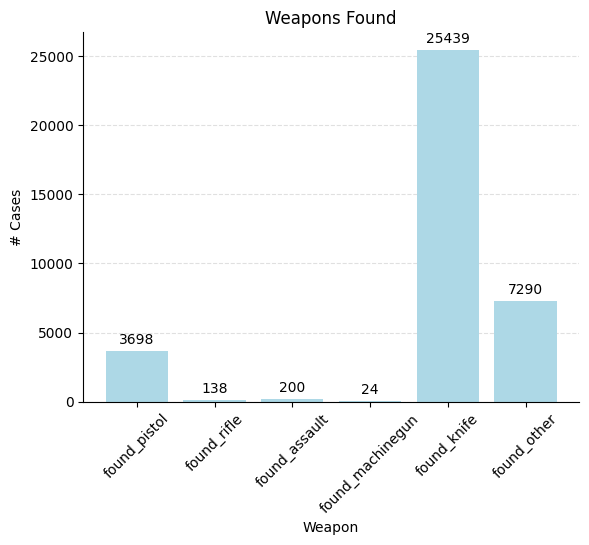

In [ ]:
fig, ax = plt.subplots()
bars = ax.bar(df1['index'], df1[0], color='lightblue')

# add sales values on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    
# Add title and axis labels
ax.set_title('Weapons Found')
ax.set_xlabel('Weapon')
ax.set_ylabel('# Cases')


# Customize plot aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.ticklabel_format(axis='y', style='plain')
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7)

plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='year', ylabel='count'>

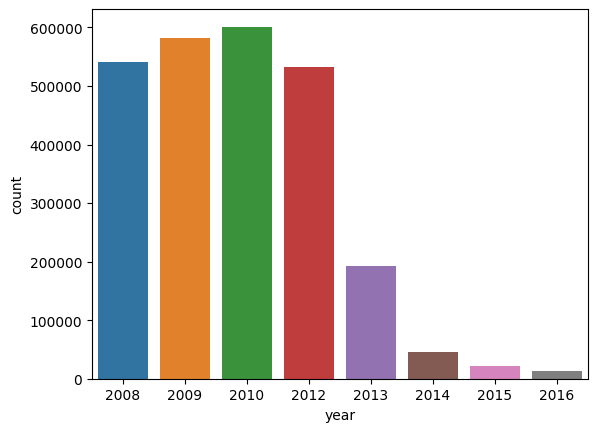

In [ ]:
sns.countplot(x=data["year"])

In [ ]:
df2= data[['year','found_pistol','found_rifle','found_assault','found_machinegun','found_knife','found_other']]

<ipython-input-45-bd40b79b6029>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  proportions = grouped.groupby(level=0).apply(lambda x: x / x.sum())


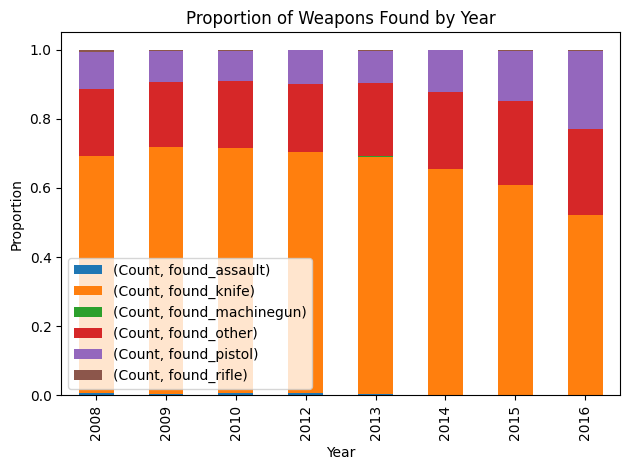

In [ ]:
# reshape the dataframe using melt()
melted = pd.melt(df2, id_vars=['year'], value_vars=['found_pistol','found_rifle','found_assault','found_machinegun','found_knife','found_other'], var_name='Weapon', value_name='Count')

# group the data by year and weapon type, and calculate the total count for each group
grouped = melted.groupby(['year', 'Weapon']).sum()

# calculate the proportion of each weapon type for each year
proportions = grouped.groupby(level=0).apply(lambda x: x / x.sum())

# create a stacked bar graph of the weapon proportions by year
ax = proportions.unstack(level=1).plot(kind='bar', stacked=True)

# rename the legends
legend_dict = {'found_pistol':'Pistols','found_rifle':'Rifle','found_assault':'Assault','found_machinegun':'Machine Gun','found_knife':'Knife','found_other':'Other'}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_dict.get(label, label) for label in labels]
ax.legend(handles, new_labels)

# add title and axis labels
plt.title('Proportion of Weapons Found by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')

plt.tight_layout()

# show the plot
plt.show()


,found_pistol,found_rifle,found_assault,found_machinegun,found_knife,found_other
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2528266,False,False,False,False,False,False
2528267,False,False,False,False,False,False
2528268,False,False,False,False,False,False
2528269,False,False,False,False,False,False


In [ ]:
data.found_weapon.value_counts()

False    2493270
True       35001
Name: found_weapon, dtype: int64

In [50]:
data = pd.read_csv('sqf_data.csv')

<ipython-input-50-52781e3e6ce6>:1: DtypeWarning: Columns (12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('sqf_data.csv')


In [53]:
data.year.value_counts()

2008    85367
Name: year, dtype: int64